# Part 1---Regression

In [68]:
import pandas as pd
import numpy as np
#Show max 100 columns or rows
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
#Don't use scientific notation for numbers (e.g 1.003767687e-12)
pd.set_option('display.float_format','{:.5f}'.format)
np.set_printoptions(suppress=True)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [69]:
#Load in the CSV
df = pd.read_csv("/Users/liangminghao/Desktop/Task/BIRAFFE2-metadata-RAW-GEQ-Level01.csv")

In [70]:
df.columns

Index(['ID', 'AGE', 'SEX', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33'],
      dtype='object')

In [71]:
df.describe()

,ID,AGE,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
count,103.00000,102.00000,103.00000,103.00000,103.00000,103.00000,103.00000,103.00000,103.00000,103.00000,103.00000,103.00000,103.00000,103.00000,103.00000,103.00000,103.00000,103.00000,103.00000,103.00000,103.00000,103.00000,103.00000,103.00000,103.00000,103.00000,103.00000,103.00000,103.00000,103.00000,103.00000,103.00000,103.00000,103.00000,103.00000
mean,493.55340,21.62745,3.50485,3.48544,2.94175,3.79612,3.47573,3.04854,1.83495,2.22330,2.00000,3.33981,1.75728,2.76699,2.96117,3.72816,3.57282,2.20388,3.19417,2.32039,3.51456,3.59223,3.30097,2.32039,2.21359,2.09709,2.58252,3.21359,2.37864,3.43689,2.00971,2.22330,2.43689,2.28155,2.00971
std,253.74971,1.32696,1.05602,1.12776,1.29725,1.15775,1.18689,1.09704,1.02992,1.11963,1.15470,1.15090,0.91251,1.11323,1.17925,0.99207,1.01558,1.01324,1.20504,1.12209,1.12776,1.07043,1.25897,1.21440,1.26530,1.22486,1.17594,1.24971,1.06749,0.99676,1.15041,1.12835,1.13474,1.26350,1.11580
min,103.00000,18.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
25%,261.50000,21.00000,3.00000,3.00000,2.00000,3.00000,2.00000,2.00000,1.00000,2.00000,1.00000,2.00000,1.00000,2.00000,2.00000,3.50000,3.00000,2.00000,2.00000,2.00000,3.00000,3.00000,2.00000,1.00000,1.00000,1.00000,2.00000,2.00000,2.00000,3.00000,1.00000,1.00000,2.00000,1.00000,1.00000
50%,457.00000,21.00000,4.00000,4.00000,3.00000,4.00000,4.00000,3.00000,2.00000,2.00000,2.00000,4.00000,2.00000,3.00000,3.00000,4.00000,4.00000,2.00000,4.00000,2.00000,4.00000,4.00000,3.00000,2.00000,2.00000,2.00000,2.00000,3.00000,2.00000,4.00000,2.00000,2.00000,2.00000,2.00000,2.00000
75%,674.00000,22.00000,4.00000,4.00000,4.00000,5.00000,4.00000,4.00000,2.00000,2.00000,2.00000,4.00000,2.00000,4.00000,4.00000,4.00000,4.00000,3.00000,4.00000,3.00000,4.00000,4.00000,4.00000,3.00000,3.00000,3.00000,4.00000,4.00000,3.00000,4.00000,2.50000,3.00000,3.00000,3.00000,3.00000
max,997.00000,26.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,4.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000


In [72]:
#First we drop the SEX column (its not numbers)
x = df
x_scaled = x.drop("SEX", axis = 1)

In [73]:
x_scaled = x_scaled.dropna()

In [74]:
#Standardise
x_scaled = StandardScaler().fit_transform(x_scaled)

In [75]:
x_scaled

array([[-1.54133399, -2.74715449, -0.51590264, ..., -1.28895608,
        -0.22507687, -0.91752008],
       [-1.47826782,  0.28214019, -1.4903854 , ..., -0.40062148,
        -0.22507687, -0.01764462],
       [-1.47432619, -0.47518348,  0.45858012, ...,  1.3760477 ,
         2.1498722 , -0.91752008],
       ...,
       [ 1.87212221, -0.47518348,  0.45858012, ...,  2.2643823 ,
         2.1498722 , -0.01764462],
       [ 1.90365529, -1.23250715,  0.45858012, ..., -0.40062148,
        -0.22507687, -0.01764462],
       [ 1.98248799, -0.47518348, -0.51590264, ...,  1.3760477 ,
        -0.22507687, -0.01764462]])

Plot "1" and "4"

In [76]:
import matplotlib.pyplot as plt
from sklearn import preprocessing

data = df[["1","4"]].values
x = data[:,0]
y = data[:,1]
print(x)
print(y)

[3 2 4 4 4 2 4 4 5 5 4 4 3 4 5 2 4 3 3 4 4 5 4 3 4 4 1 3 1 4 2 4 3 4 5 2 2
 2 4 4 4 2 2 4 4 5 5 2 4 1 2 3 4 4 3 4 4 5 4 1 4 3 5 5 4 4 4 4 4 4 1 4 4 4
 4 3 3 5 4 2 4 3 4 3 3 4 4 3 4 3 4 2 2 5 3 2 5 4 5 3 4 4 3]
[4 1 4 2 4 2 4 5 5 4 4 4 3 4 5 4 5 4 4 3 4 4 5 2 5 5 2 4 1 4 4 3 3 4 5 2 3
 1 4 5 5 5 4 5 4 5 5 3 5 2 4 3 4 5 2 4 4 5 4 2 4 4 4 5 4 4 5 5 4 4 2 5 4 5
 4 5 4 5 5 1 5 3 4 4 4 4 2 1 5 4 4 2 3 5 4 1 4 2 5 4 5 4 4]


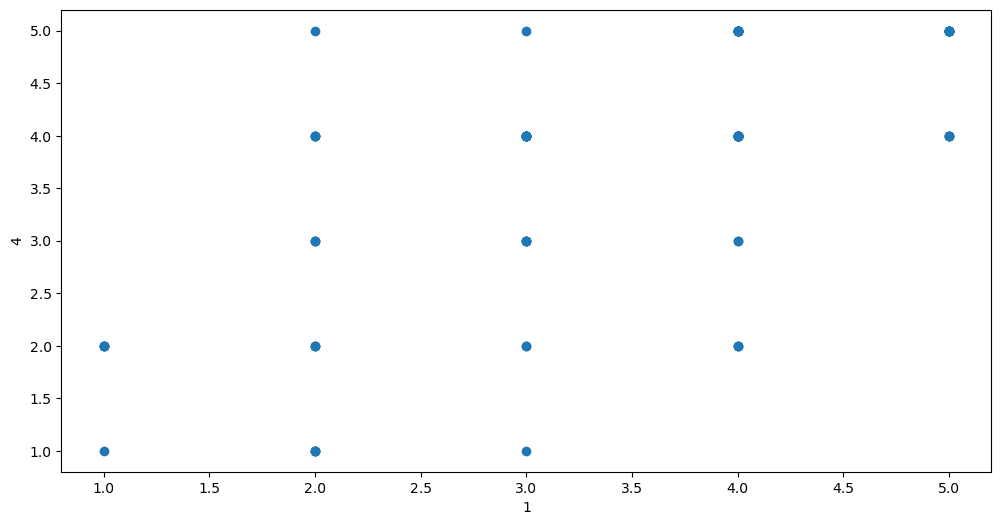

In [77]:
import matplotlib.pyplot as plt
from sklearn import preprocessing

data = df[["1","4"]].values
x = data[:,0]
y = data[:,1]

def plot_scatter(x,y,xlabel,ylabel):
    fig,ax = plt.subplots(figsize = (12,6))
    ax.scatter(x,y)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.ticklabel_format(style='plain')
    return ax
ax = plot_scatter(x,y,"1","4")

# Correlation
I've used correlation to investigate how much of relationship there is between two variables.

# .stats.pearsonr()
Runs from -1 to 1 and tells us how correlated two variables are. A correlation of 0 is random (no relationship).

In [78]:
#Correlate
from scipy import stats
r, p = stats.pearsonr(x,y)
r

0.6623775885506519

r coeffient is 662378. This tells us that there is a little good correlation between the '1' and '4'

# Making Models

So we have determined that we think there is a linear relationship between these two variables, now we'll look at how we can build a linear model to fit this relationship.

My model will be defined completely using the formual below

y = ax + b + e

Where y is the dependent variable, x is the independent variable, a and b are two parameters to set and e is the error.

# .stats.linregress()
I can do that using linregress() from the scipy.stats package. This returns a value for the slope (a) and intercept (b).

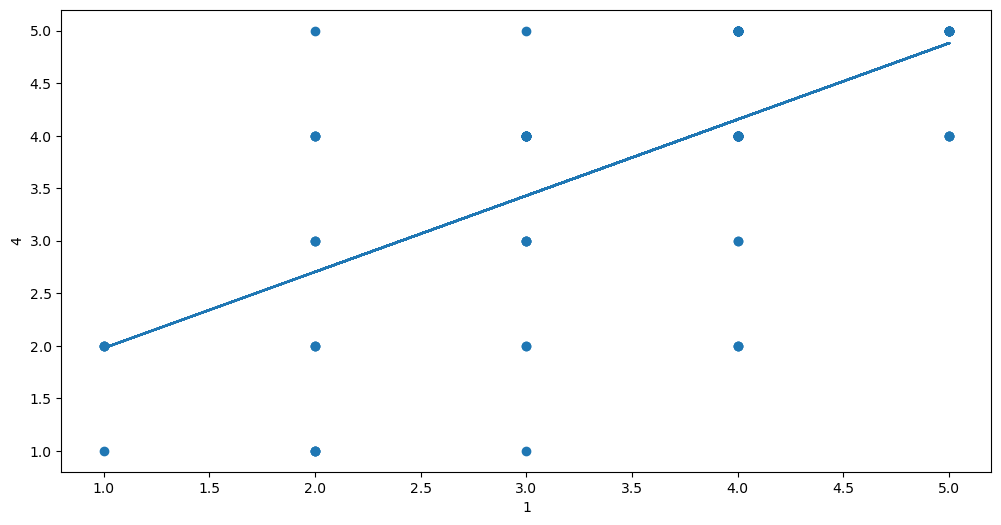

In [79]:
data = df[["1","4"]].values
x = data[:,0]
y = data[:,1]
slope, intercept, r, p, std_err = stats.linregress(x, y)
slope = np.float32(slope)
model_y = [slope * i + intercept for i in x]

ax = plot_scatter(x,y,"1","4")
ax.plot(x, model_y)

In [80]:
#Interpret our police model
slope, intercept

(0.7261864, 1.2509388869921465)

# Interpretting the Model
y('4')=0.7261864*x('1')+1.2509388869921465

# Evaluate

# r^2

I used the r^2 (r squared), otherwise known as the coefficient of determination to evaluate the fit of my model.

An r^2 of 1 is a perfect model and an r^2 of 0 means the model is no better than just picking the mean for every prediction.

In [81]:
#a good fit? Also known as the Coefficient of determination
r

0.6623775885506528

In [82]:
r**2

0.43874406981417785

This model is great.

# p-value

I got a p-value returned by our model, and I knew that this is result of a hypothesis test.

The hypothesis I am looking to test is that there is a non-zero slope for this model, making the null hypothesis that the slope is 0. A p-value of less than 0.05 allows me the reject the null hypothesis and conclude there is a relationship between the two variables

In [83]:
p

2.5408985378920007e-14

There is a relationship between the two variables

# Which states don't fit the model, .annotate()

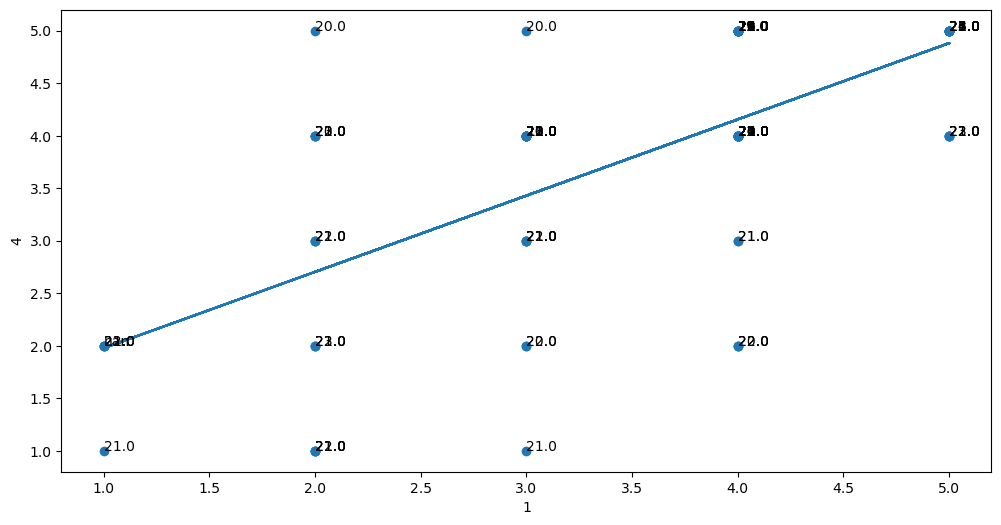

In [84]:
def plot_scatter(x,y,xlabel,ylabel,annotate=True):
    fig,ax = plt.subplots(figsize = (12,6))
    ax.scatter(x,y)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.ticklabel_format(style='plain')
    if annotate:
        annotations = df["AGE"].values
        for i, label in enumerate(annotations):
            ax.annotate(label, (x[i], y[i]))
    return ax

ax = plot_scatter(x,y,"1","4")
ax.plot(x, model_y)


20 years old appears above and below this line.

# Multiple Regression

y = ax1 + bx2 + cx3 + d + error

linear_model.LinearRegression()
Again, this can solved algebraicly and use the linear_model.LinearRegression() function from the sklearn library to do so.


In [85]:
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score
car_df = pd.read_csv("/Users/liangminghao/Desktop/Task/BIRAFFE2-metadata-RAW-GEQ-Level01.csv") 
x = car_df[['1','2']]
y = car_df['4'] 
regr = linear_model.LinearRegression()
regr.fit(x, y) 
print(regr.coef_, regr.intercept_,regr.score(x, y)) 

[ 0.78504869 -0.12008192] 1.463173126856224 0.44954384118984936


y=0.78504869x('1')-0.12008192x('2')+1.463173126856224

# Predicting New Values, .predict()
Use it to predict new values using the .predict() function.

In [86]:
regr.predict([[6,7]])

/Users/liangminghao/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.33289183])

If x('1') is 6 and x('2') is 7, I expect the y('4') is 5.33.

# Part 2---Clustering with k-means

In [101]:
import random, os, sys, shutil
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# .isna().any()
Find if there are any NaN values in each column.

In [102]:
df.isna().any()

ID     False
AGE     True
SEX    False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
dtype: bool

Replace "nan" to 'not record'

In [105]:
df['AGE']=df['AGE'].fillna('not record')

In [106]:
df.isna().any()

ID     False
AGE    False
SEX    False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
dtype: bool

# Correlation Matrix
A quick way to see if any of the features are correlated is to use the built in df.corr() function in Pandas.

Obviously, each feature is completely correlated with itself (row of ones down the diagonal).

The nearer a value is to 1, more the two features are positively correlated.

In [107]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/yc/hhn6n9wj4597fzglj93p_df80000gn/T/ipykernel_70853/2001914525.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
ID,1.00,0.03,0.06,-0.01,0.01,0.10,0.11,-0.06,-0.08,-0.14,0.01,0.02,0.04,0.12,0.12,-0.03,-0.04,0.08,-0.05,0.06,0.06,-0.03,0.23,-0.04,0.07,-0.02,-0.01,0.08,0.13,0.10,-0.12,0.15,-0.00,0.02
1,0.03,1.00,0.46,0.29,0.66,0.49,0.66,-0.60,-0.32,-0.59,0.37,-0.40,0.34,0.22,0.64,0.50,-0.48,0.54,0.32,0.31,0.73,0.50,-0.40,-0.37,-0.56,0.18,0.20,0.17,0.40,-0.34,0.18,0.22,-0.17,-0.21
2,0.06,0.46,1.00,0.04,0.21,0.29,0.38,-0.32,-0.13,-0.36,0.61,-0.31,0.17,0.12,0.40,0.66,-0.25,0.38,0.08,0.15,0.50,0.43,-0.29,-0.42,-0.38,0.10,-0.06,0.08,0.23,-0.47,0.08,0.11,-0.23,-0.34
3,-0.01,0.29,0.04,1.00,0.29,0.34,0.23,-0.08,-0.10,-0.25,0.15,-0.04,0.44,0.02,0.25,0.09,-0.39,0.30,0.39,0.38,0.38,0.15,-0.16,0.07,-0.19,0.11,0.30,0.39,0.19,-0.15,0.28,0.12,-0.02,0.03
4,0.01,0.66,0.21,0.29,1.00,0.50,0.62,-0.50,-0.41,-0.59,0.32,-0.38,0.40,0.18,0.63,0.38,-0.58,0.35,0.36,0.28,0.73,0.39,-0.20,-0.26,-0.37,0.15,0.21,0.35,0.41,-0.23,0.22,0.16,-0.30,-0.26
5,0.10,0.49,0.29,0.34,0.50,1.00,0.49,-0.38,-0.46,-0.43,0.19,-0.13,0.26,0.24,0.41,0.32,-0.49,0.24,0.16,0.30,0.49,0.25,-0.13,-0.23,-0.26,0.27,0.25,0.31,0.51,-0.15,0.31,0.30,-0.05,-0.00
6,0.11,0.66,0.38,0.23,0.62,0.49,1.00,-0.64,-0.33,-0.58,0.34,-0.48,0.34,0.20,0.71,0.59,-0.46,0.55,0.27,0.17,0.68,0.50,-0.45,-0.48,-0.66,0.19,-0.02,0.14,0.26,-0.45,0.19,0.26,-0.32,-0.39
7,-0.06,-0.60,-0.32,-0.08,-0.50,-0.38,-0.64,1.00,0.27,0.61,-0.31,0.44,-0.27,-0.04,-0.59,-0.52,0.31,-0.46,-0.17,-0.11,-0.56,-0.48,0.49,0.50,0.60,-0.03,0.07,-0.01,-0.13,0.42,-0.13,-0.11,0.19,0.45
8,-0.08,-0.32,-0.13,-0.10,-0.41,-0.46,-0.33,0.27,1.00,0.35,-0.06,0.15,-0.09,-0.44,-0.34,-0.09,0.35,-0.02,-0.07,-0.07,-0.25,-0.05,0.06,0.19,0.18,-0.23,-0.17,-0.09,-0.50,0.05,-0.01,-0.32,0.03,0.05
9,-0.14,-0.59,-0.36,-0.25,-0.59,-0.43,-0.58,0.61,0.35,1.00,-0.38,0.47,-0.29,-0.09,-0.68,-0.43,0.49,-0.32,-0.14,-0.17,-0.66,-0.47,0.36,0.44,0.52,-0.10,-0.00,-0.21,-0.22,0.44,-0.10,-0.05,0.28,0.46


# Clustering

In [108]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardise
First we have to standardise the range of the dataset, as PCA and K-Means are effected by scale.

In [109]:
#First we drop the country column (its not a number and not interesting for analysis)
x = df
x = x.dropna()
x_scaled = x.drop("AGE", axis = 1)
x_scaled = x_scaled.drop("SEX", axis = 1)

In [110]:
#Standardise
x_scaled = StandardScaler().fit_transform(x_scaled)

# Plot in 2D
Now we can use PCA to reduce the dataset to only 2 dimensions. This means we can plot it on a 2D axis.

In [111]:
#Get reduced dimensions
pca = PCA(n_components=2)
x_2d = pca.fit_transform(x_scaled)

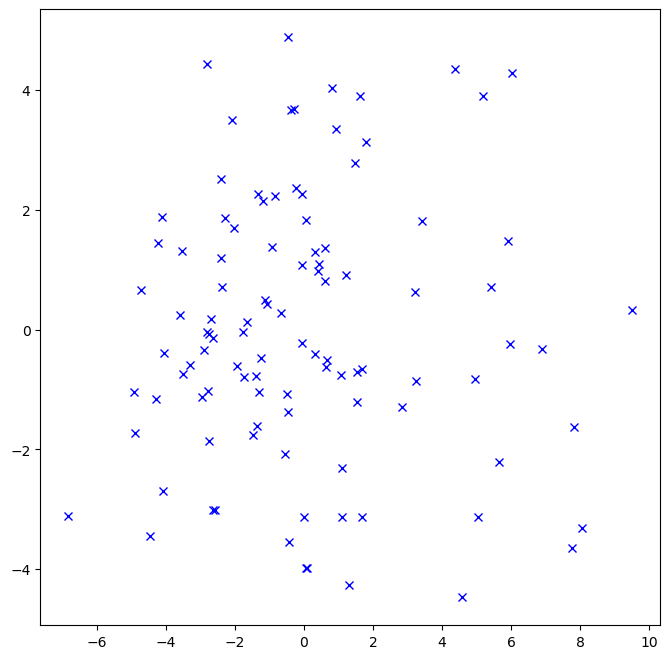

In [112]:
#Plot
plt.figure(figsize=(8, 8))
a = plt.plot(x_2d[:,0],x_2d[:,1],"bx")

In [113]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='r', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_clusters(clusterer, X):
    labels = clusterer.predict(X)
    pca = PCA(n_components=2)
    x_2d = pca.fit_transform(X)
    plt.scatter(x_2d[:, 0], x_2d[:, 1], c=labels, alpha=0.3)
    plot_centroids(clusterer.cluster_centers_)

# Elbow Plot
Look for the elbow that shows a big jump in inertia before a flattening off. Here we plot the first 20 values of k.



([<matplotlib.axis.XTick at 0x14c5e2e50>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

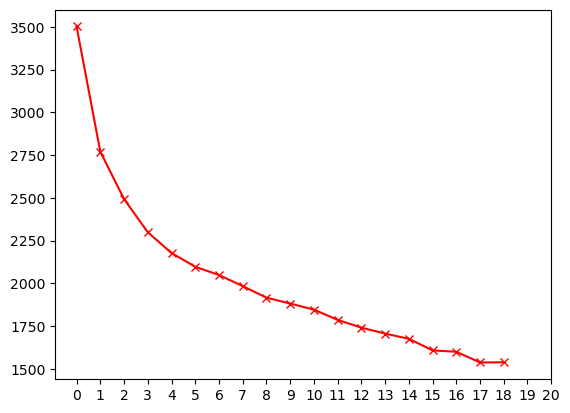

In [114]:
scores=[]
for i in range(1,20):
    #Fit for k
    means=KMeans(n_clusters=i)
    means.fit(x_scaled)
    #Get inertia
    scores.append(means.inertia_)
plt.plot(scores,"-rx")
plt.xticks(np.arange(0, 21, 1.0))


# Cluster and Plot
First try with all the features.

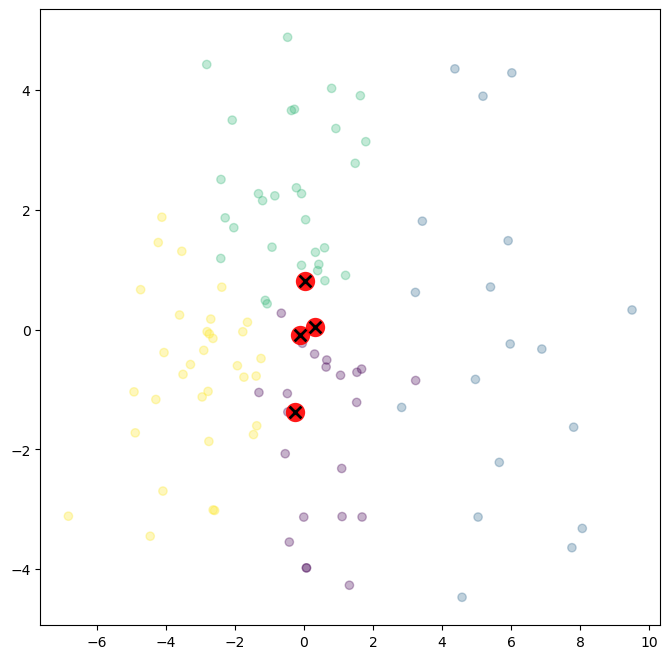

In [115]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_scaled)
plt.figure(figsize=(8, 8))
#Plot clusters onto PCA reduced plot
plot_clusters(kmeans, x_scaled)

# Reducing Dimensions before clustering

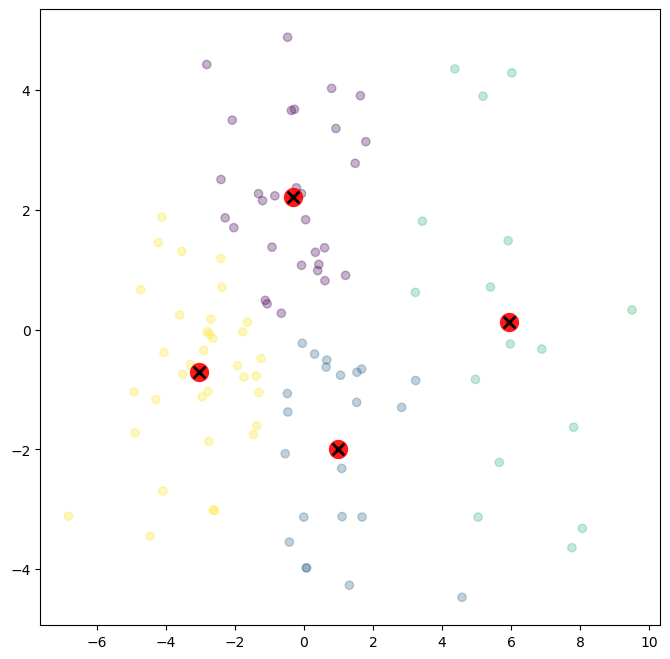

In [116]:
#How many dimensions to reduce to (before clustering)?
num_dimensions = 2 

#Reduce dimensions
pca = PCA(n_components=num_dimensions)
x_less_dimensions = pca.fit_transform(x_scaled)

#Fit cluster
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_less_dimensions)

#Plot results on 2D plot
plt.figure(figsize=(8, 8))
plot_clusters(kmeans, x_less_dimensions)

# Examine Clusters
Here I plot a selection of features for each cluster.

Text(0.5, 0, 'cluster number')

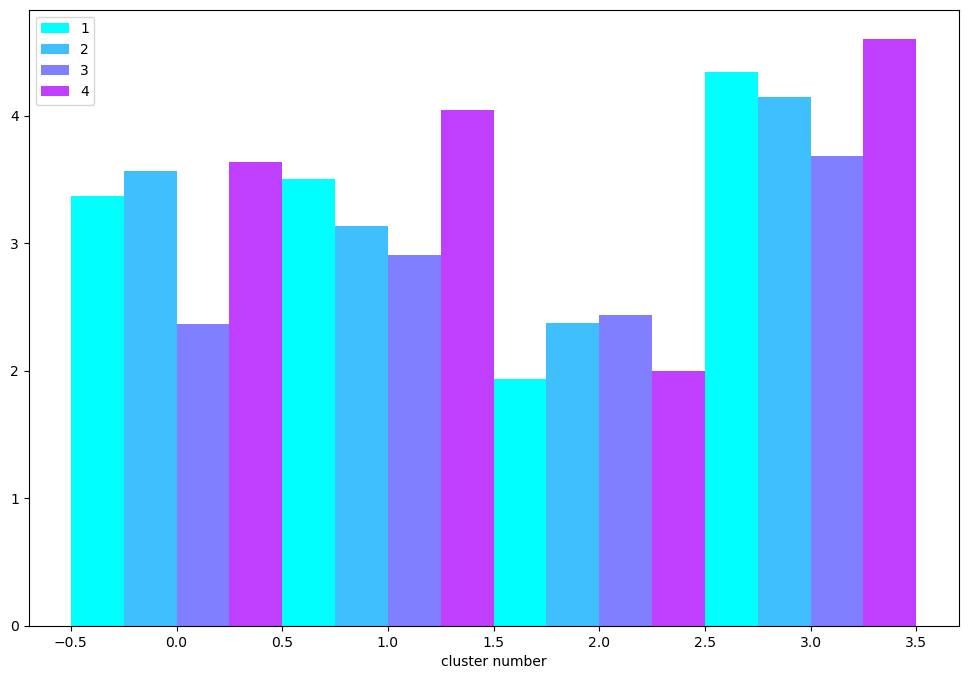

In [117]:
#Add cluster labels as extra column in dataframe
labels = kmeans.predict(x_less_dimensions)
x["AGE"] = labels

#Pick some features to plot
features = ['1', '2', '3', '4']
width = 1/(len(features))

fig,ax = plt.subplots(figsize=(12, 8))

for i in range(k):
    ax.bar([i],[1],width=width*4,color = "azure" if i%2==0 else "whitesmoke")

cmap = plt.cm.get_cmap('cool')
#Iterate through features
for index, f in enumerate(features):
    #Get mean for each feature for each cluster
    data = [np.mean(x[x["AGE"]==i][f]) for i in range(k)]
    
    x_vals = np.arange(len(data)) + (width*index) - 0.5 + width/2
    
    #Plot this feature for each cluster
    ax.bar(x_vals, data, width = width, label = f, color = cmap(index/len(features)))
    
ax.legend()
ax.set_xlabel("cluster number")

In [118]:
print(x[x['AGE'] == 0])

      ID  AGE SEX  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  \
0    103    0   M  3  4  2  4  2  3  1  2  2   5   2   3   2   4   4   3   3   
11   181    0   F  4  3  5  4  4  3  1  4  2   2   2   4   1   4   4   3   4   
12   193    0   M  3  4  2  3  4  2  2  2  2   4   2   2   2   4   4   3   3   
15   202    0   M  2  4  1  4  1  3  2  2  4   5   1   4   4   4   5   4   1   
16   208    0   M  4  4  1  5  3  3  2  2  1   2   2   2   2   4   3   2   2   
18   222    0   M  3  2  2  4  4  3  1  4  2   2   2   3   1   4   3   2   3   
19   223    0   M  4  4  2  3  4  2  2  4  1   5   1   3   2   4   5   3   0   
21   230    0   M  5  4  1  4  2  4  1  2  1   4   1   2   2   4   4   2   4   
27   275    0   F  3  3  4  4  2  2  3  3  2   4   1   2   1   3   3   3   3   
32   330    0   M  3  4  2  3  4  3  3  2  2   4   1   2   2   3   4   4   4   
33   333    0   M  4  2  1  4  4  4  1  3  2   4   1   3   2   4   4   2   4   
36   348    0   M  2  3  1  3  2  2  1  

In [119]:
print(x[x['AGE'] == 1])

      ID  AGE SEX  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  \
6    153    1   F  4  3  4  4  4  3  2  2  3   4   2   3   4   4   3   2   3   
9    170    1   M  5  3  1  4  4  3  3  1  5   2   1   1   4   3   4   3   4   
17   211    1   F  3  2  4  4  4  4  1  1  1   2   2   2   5   4   2   2   2   
23   246    1   M  3  4  4  2  4  2  1  2  2   4   2   2   2   4   4   2   4   
29   318    1   M  4  2  2  4  2  3  2  2  2   3   2   3   4   4   3   2   4   
31   322    1   M  4  3  4  3  2  2  3  4  1   2   4   1   2   3   2   2   3   
40   383    1   M  4  1  1  5  4  3  1  1  1   1   2   3   4   4   2   2   1   
42   391    1   M  2  3  2  4  4  1  3  1  4   2   4   4   4   3   1   2   2   
44   404    1   M  4  4  3  4  5  3  2  1  1   3   2   1   5   4   4   1   4   
61   570    1   F  3  4  2  4  4  2  2  4  3   4   2   3   2   4   3   2   4   
66   589    1   F  4  4  4  5  5  2  2  1  1   3   1   2   5   2   3   1   1   
67   603    1   M  4  3  4  5  4  3  2  

# Part 3---NLP(LSA and LDA)

In [124]:
import re 
import nltk 
import numpy as np

import pandas as pd 
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction import _stop_words as stop_words
from sklearn.metrics.pairwise import cosine_similarity as cosine
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.tokenize.casual import casual_tokenize
import pandas as pd
import re
from sklearn.decomposition import TruncatedSVD

In [125]:
data_from_csv=pd.read_csv("/Users/liangminghao/Desktop/Task/BIRAFFE2-metadata-RAW-GEQ-Level01.csv")

In [126]:
data_from_csv.sample(20) #show us the first 3 rows

,ID,AGE,SEX,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
37,356,21.00000,F,2,2,3,1,1,1,4,5,5,1,4,3,5,3,3,4,1,1,4,1,2,2,5,3,4,5,1,3,5,2,2,5,5
5,148,23.00000,M,2,2,4,2,4,2,2,2,4,2,4,1,2,2,2,1,4,4,4,2,2,4,4,4,4,4,2,2,4,4,2,4,4
97,938,22.00000,M,4,5,2,2,5,3,1,2,1,5,1,4,2,4,5,4,2,1,3,3,5,3,1,1,2,5,2,3,1,1,2,4,1
59,560,21.00000,F,1,1,2,2,4,1,4,1,4,1,4,2,4,2,1,2,1,1,4,2,1,5,5,5,2,4,2,4,5,1,2,4,4
27,275,22.00000,F,3,3,4,4,2,2,3,3,2,4,1,2,1,3,3,3,3,2,3,3,3,2,2,2,2,2,2,2,2,1,2,1,1
17,211,21.00000,F,3,2,4,4,4,4,1,1,1,2,2,2,5,4,2,2,2,2,4,4,2,1,1,1,4,2,4,2,2,4,4,2,3
78,683,21.00000,F,4,3,4,5,5,4,2,2,2,4,2,3,3,4,3,1,3,2,4,4,3,2,3,2,2,3,2,3,1,2,3,1,2
76,672,22.00000,M,3,4,3,4,4,2,3,2,3,3,2,2,3,3,4,2,4,2,3,3,3,3,3,3,2,3,3,4,2,2,2,3,3
55,504,21.00000,M,4,4,4,4,3,4,2,2,2,3,2,4,2,4,4,2,4,2,4,4,4,2,2,2,2,2,2,4,2,2,2,2,2
93,900,23.00000,M,5,5,2,5,5,3,1,1,1,4,1,3,4,5,5,3,4,1,4,4,4,2,1,1,4,2,3,4,1,3,3,1,2


In [127]:
np.shape(data_from_csv) #how many rows & columns?

(103, 36)

# Now, let's apply LSA.

In [128]:
#Called once for each document
#Every time I update this function I need to run the cell again (Shift + Enter)]
lem = WordNetLemmatizer()
def my_tokeniser(doc):
    #Split on spaces
    tokens = re.split(r'[-\s.,;!?]+', doc)
    return [lem.lemmatize(t.lower()) for t in tokens if not t in stop_words.ENGLISH_STOP_WORDS]

In [129]:
tfidf_vectoriser = TfidfVectorizer(tokenizer=my_tokeniser)

In [130]:
tfidf = tfidf_vectoriser.fit_transform(df["SEX"])
#Save list of unique tokens (vocab) for later
vocab = tfidf_vectoriser.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf.todense(), columns = vocab)
print(tfidf.todense().shape)

(103, 2)


In [131]:
#Subtract mean
tfidf_df = tfidf_df - tfidf_df.mean()

In [132]:
#How many topics?
num_topics = 2
pd.options.display.max_columns=num_topics
labels = ['topic{}'.format(i) for i in range(num_topics)]

In [133]:
labels

['topic0', 'topic1']

In [134]:
#Calculate topics
svd = TruncatedSVD(n_components = 2, n_iter = 100) 
svd_topic_vectors = svd.fit_transform(tfidf_df.values)

In [135]:
svd_topic_vectors_df = pd.DataFrame(svd_topic_vectors, columns=labels)
svd_topic_vectors_df.sample(10)

,topic0,topic1
30,-0.45310,0.00000
99,-0.45310,0.00000
16,-0.45310,0.00000
4,-0.45310,0.00000
68,-0.45310,0.00000
71,-0.45310,0.00000
78,0.96112,0.00000
1,0.96112,0.00000
60,0.96112,0.00000
84,-0.45310,0.00000


In [136]:
#How much does each topic apply to each token?
topic_weights = pd.DataFrame(svd.components_.T, index=vocab, columns=labels)
topic_weights.sample(2) #display it

,topic0,topic1
f,0.70711,-0.70711
m,-0.70711,-0.70711


In [137]:
short_text = [t[:50] for t in df["SEX"]]

In [138]:
#How much does each topic apply to each review?
svd_topic_vectors_df = pd.DataFrame(svd_topic_vectors, columns=labels, index = short_text)
svd_topic_vectors_df.sample(10)

,topic0,topic1
F,0.96112,0.00000
F,0.96112,0.00000
M,-0.45310,0.00000
F,0.96112,0.00000
M,-0.45310,0.00000
F,0.96112,0.00000
M,-0.45310,0.00000
M,-0.45310,0.00000
F,0.96112,0.00000
M,-0.45310,0.00000


In [139]:
#Highest scoring reviews for each topic
for topic in labels:
    print("________" + topic)
    #Get last reviews 10 in list (highest scoring for each topic)
    print(df["SEX"].values[svd_topic_vectors_df[topic].argsort().values[-10:]])

________topic0
['F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F']
________topic1
['F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F']


In [140]:
df.iloc[0]["SEX"]

'M'

In [141]:
svd_topic_vectors_df.iloc[0]

topic0   -0.45310
topic1    0.00000
Name: M, dtype: float64

In [142]:
num_terms = 20
for i in range(num_topics):
    print("___topic " + str(i) + "___")
    topicName = "topic" + str(i)
    weightedlist = topic_weights.get(topicName).sort_values()[-num_terms:]
    print(weightedlist.index.values)

___topic 0___
['m' 'f']
___topic 1___
['f' 'm']


# Apply Latent Dirichlet Allocation (LDA)

In [143]:
#We calculate LDA on the Bag Of Words, NOT TFIDF
count_vectoriser = CountVectorizer(tokenizer=my_tokeniser)
bag_of_words = count_vectoriser.fit_transform(df["SEX"])
vocab = count_vectoriser.get_feature_names_out()

print(bag_of_words.todense().shape)

(103, 2)


In [144]:
lda = LatentDirichletAllocation(n_components=num_topics,
                                random_state=123,
                                learning_method='batch')

In [145]:
lda_topics = lda.fit_transform(bag_of_words)

In [146]:
#How much does each topic apply to each song?
lda_topic_vectors_df = pd.DataFrame(lda_topics, columns=labels)
lda_topic_vectors_df.sample(10)

,topic0,topic1
4,0.25036,0.74964
30,0.25036,0.74964
94,0.74986,0.25014
7,0.74986,0.25014
70,0.74986,0.25014
51,0.25036,0.74964
48,0.74986,0.25014
90,0.25036,0.74964
25,0.25036,0.74964
6,0.74986,0.25014


In [147]:
df["SEX"][23]

'M'

In [148]:
#Highest scoring reviews for each topic
for topic in labels:
    print(topic)
    #Get last songs 10 in list (highest scoring for each topic)
    print(df["SEX"].values[lda_topic_vectors_df[topic].argsort().values[-10:]])

topic0
['F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F']
topic1
['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M']


In [149]:
#Most relevant tokens for each topic
for i, topic in enumerate(lda.components_):
    print("topic " + str(i) + ":")
    #Get last n tokens (highest values)
    print(vocab[topic.argsort()[-num_terms:]])

topic 0:
['m' 'f']
topic 1:
['f' 'm']
